# SCNN-NDP Model
Neural Dynamic Policies with a pretrained Simple Convolutional Neural Network(SCNN).

## The network architecture of the SCNN-NDP model

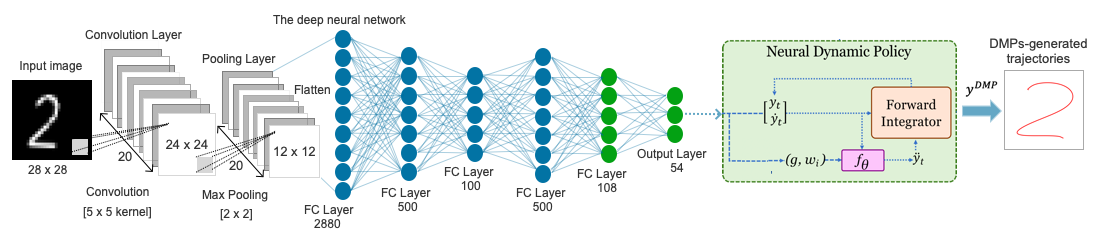

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
print("Root path:", root_path)

import numpy as np
import cv2
import torch
from datetime import datetime
import os
import argparse
from ndp.ndp_nets.scnn_ndp_main import NdpSCNN
plt.ion()   # interactive mode

Root path: /Users/shengdaolin_sh/dir_developer/workspaces/pycharm/acs-project-msc_project_ndp


In [2]:
def show_images(image_dir, data_stub, digit, images, X_test, Y_test, test_sample_indices):
    y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
    y_r = Y_test[test_sample_indices]
    for i in range(0, len(test_sample_indices)):   
        plt.figure()
        image = images[test_sample_indices[i]]
        H, W = image.shape
        plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
        plt.plot(y_h[i, :, 0].detach().cpu().numpy(),y_h[i, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
        plt.plot(y_r[i, :, 0].detach().cpu().numpy(),y_r[i, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
        plt.axis('on')
#         plt.show()
        image_name = data_stub+'_'+str(digit)+'_'+str(i)+'.png'
        plt.savefig(image_dir+'/'+image_name)

### Examples of Digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) 

In [3]:
digit_str = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'all']
test_samples = [[490, 740, 1100, 1330, 1800, 2700],
                [461, 521, 901, 1001, 1101, 1431, 2061, 2141],
                [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732],
                [333, 1023, 1623, 2823, 2963],
                [214, 284, 894, 954, 1244, 1254, 1754, 1954],
                [295, 1715, 1795, 2075, 2265],
                [146, 166, 456, 546, 746, 1016, 1276, 1956, 1976, 2646],
                [157, 487, 547, 577, 737, 727, 977, 1147, 2327, 1577, 1687],
                [988, 1418, 1678, 1818, 2578, 2648],
                [1629, 1969, 1999, 2019],
                [490, 901, 2732, 1623, 214, 1715, 1976, 977, 988, 1629]
               ]

## Load Models training on s-MNIST datasets

### 1, Load the SCNN-NDP model (N=25, T=301) trained on s-MNIST

In [4]:
k = 1
T = 300 / k
N = 25
pre_trained = '../ndp/mnist_cnn/cnn_trained/mnist_cnn_net_simple_500(mnist).pt'
model = NdpSCNN(T=T, l=1, N=N, pt=pre_trained, state_index=np.arange(2))

path = '../ndp/ndp_models/scnn-ndp-il_(smnist)_(T300.0_K1_N25_L0.001_E150_B100)_(2021_07_30_14_53_08_397187)/scnn-model.pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

NdpSCNN(
  (pt): SimpleCNNNet(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=2880, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
  (middle_layer_1): Linear(in_features=500, out_features=100, bias=True)
  (middle_layer_2): Linear(in_features=100, out_features=500, bias=True)
  (middle_layer_3): Linear(in_features=500, out_features=108, bias=True)
  (middle_layer_4): Linear(in_features=108, out_features=54, bias=True)
  (last_fc): Linear(in_features=54, out_features=54, bias=True)
)

In [5]:
# Synthetic MNIST(s-MNIST)
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = '../../imednet/data/s-mnist/40x40-smnist.mat'
data_stub = 'smnist'
# load the snist image data
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [6]:
or_trajectories = torch.Tensor(np.array(or_tr)[:, :, :]).float()
or_trajectories.shape

torch.Size([20000, 301, 3])

In [7]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

/Users/shengdaolin_sh/dir_install/Aanconda3/anaconda3/envs/env_msc_project_py38/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<ipython-input-2-d251c861ed21>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


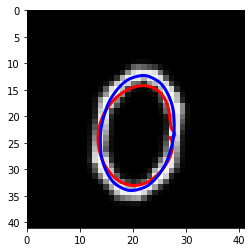

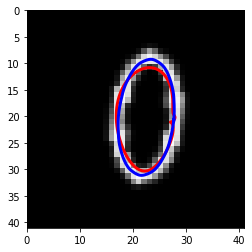

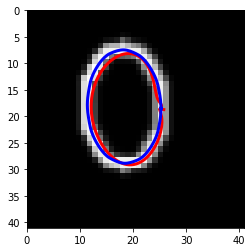

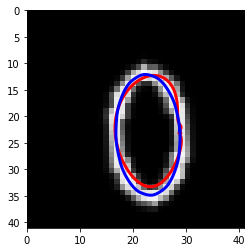

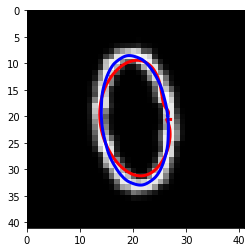

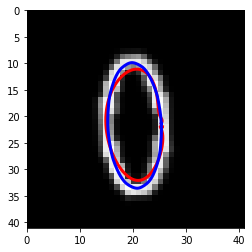

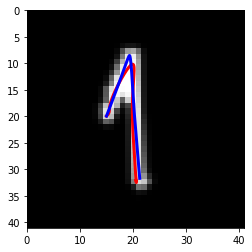

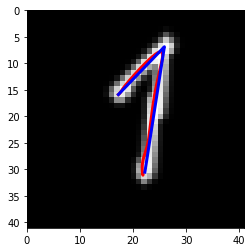

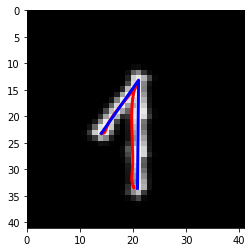

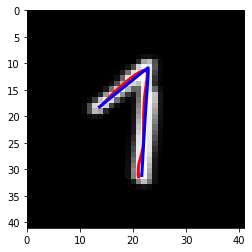

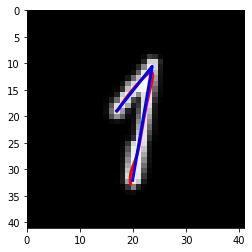

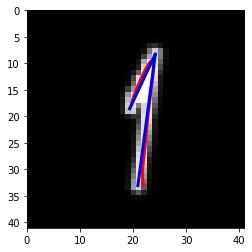

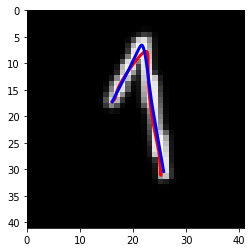

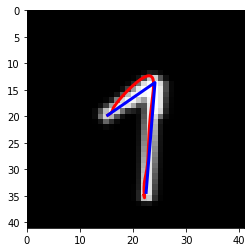

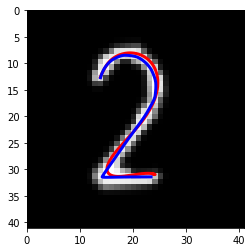

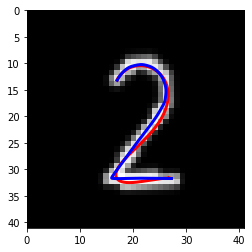

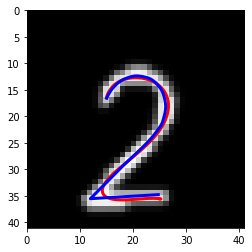

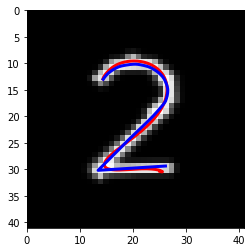

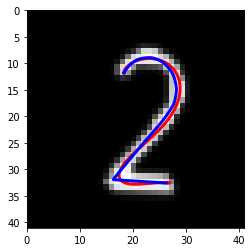

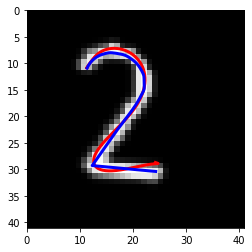

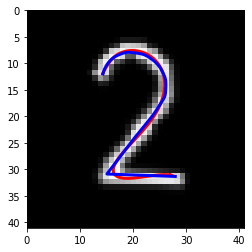

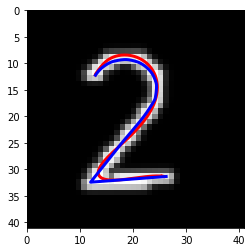

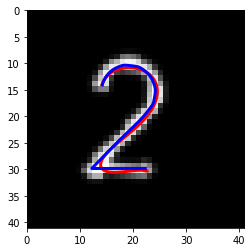

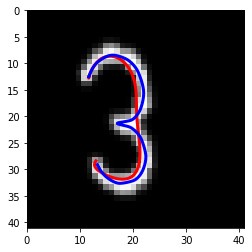

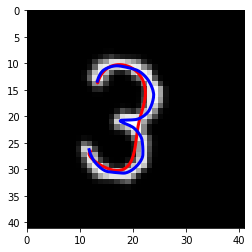

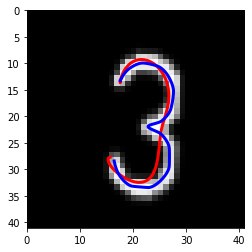

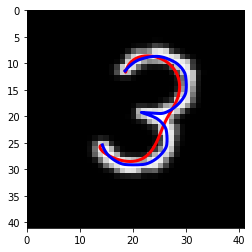

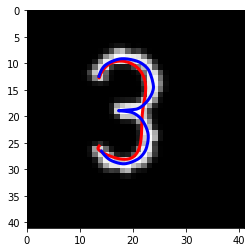

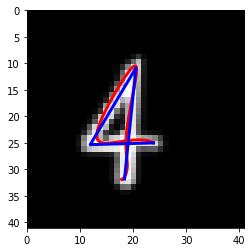

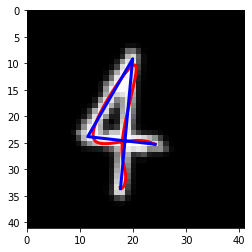

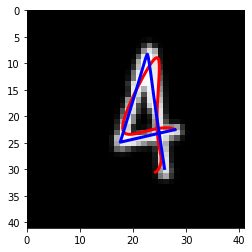

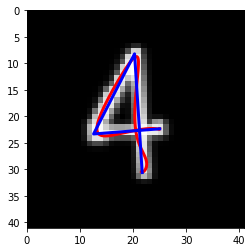

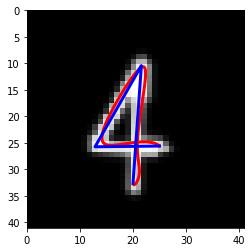

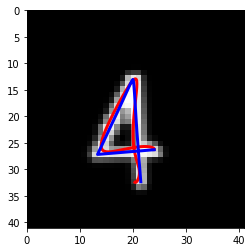

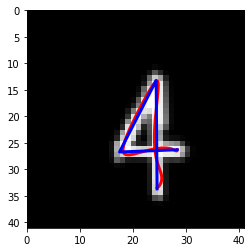

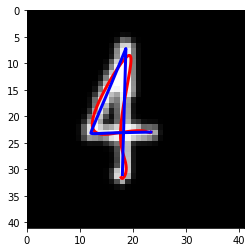

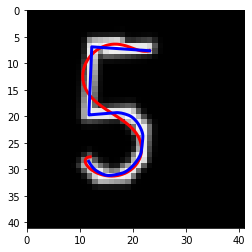

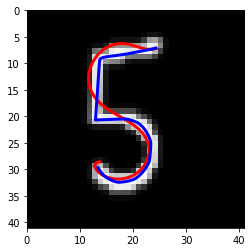

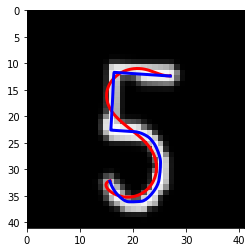

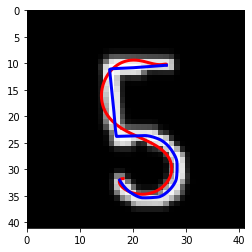

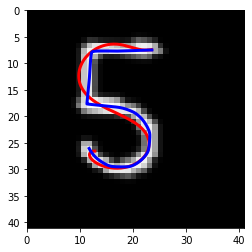

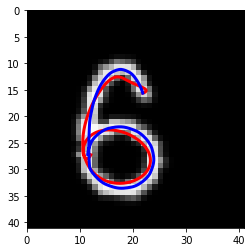

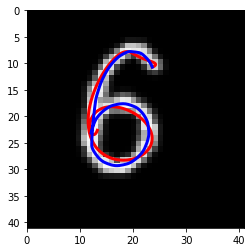

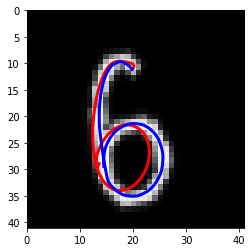

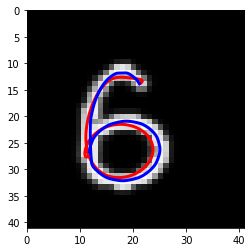

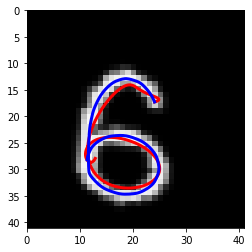

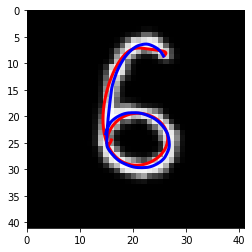

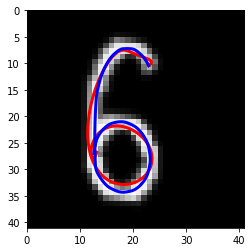

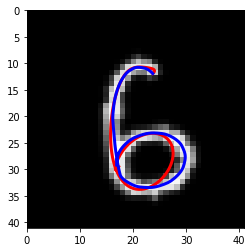

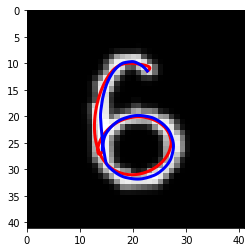

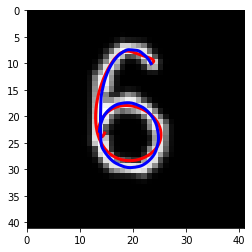

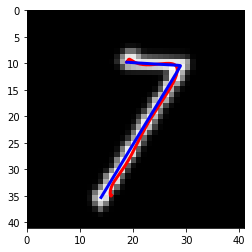

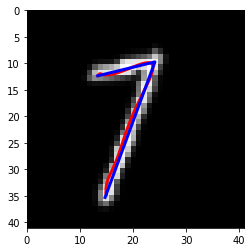

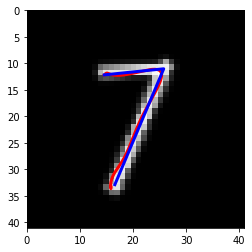

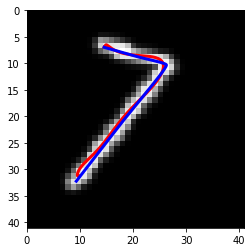

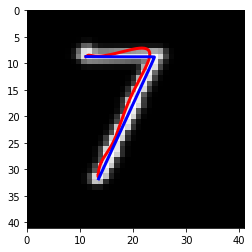

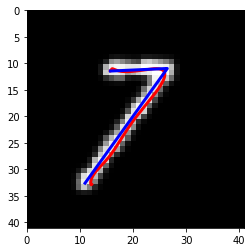

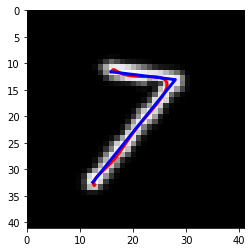

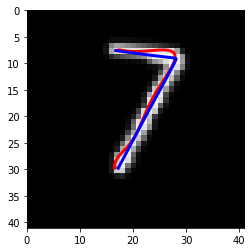

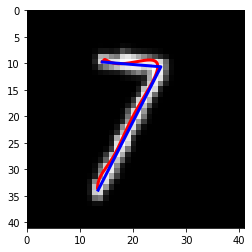

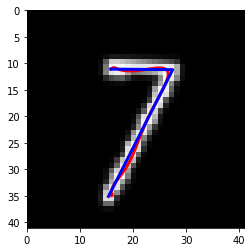

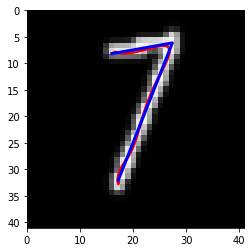

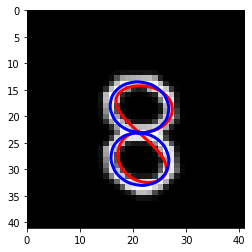

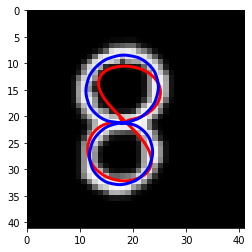

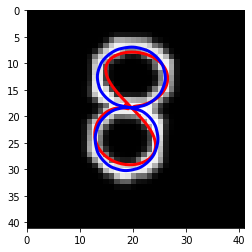

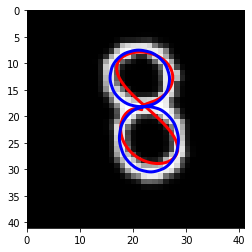

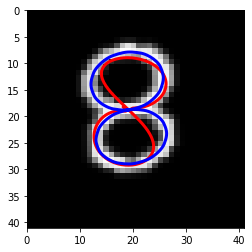

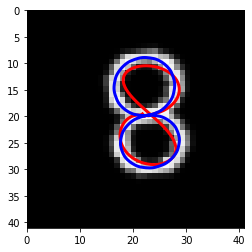

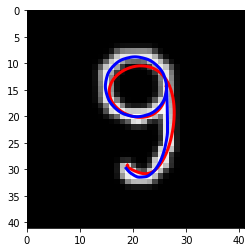

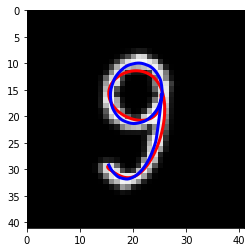

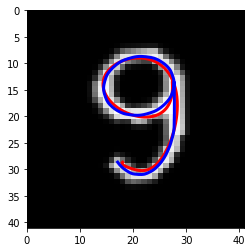

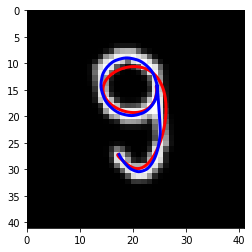

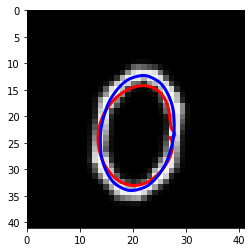

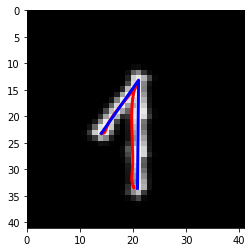

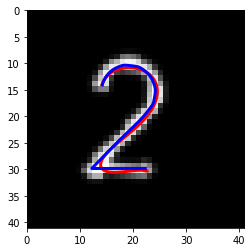

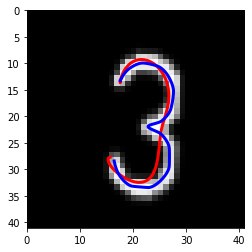

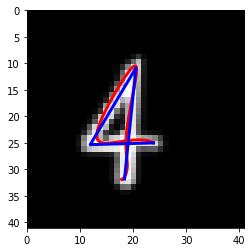

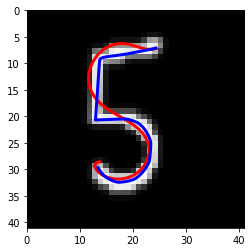

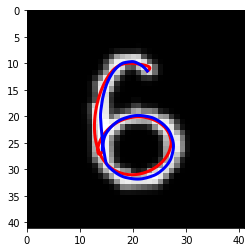

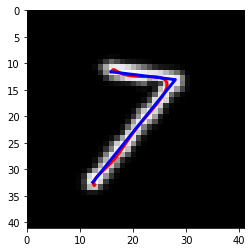

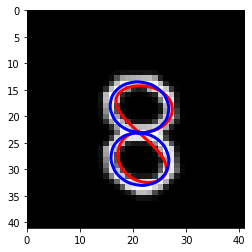

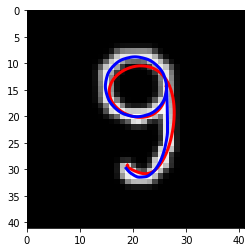

In [8]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/scnn-ndp/smnist', data_stub, digit, images, X_test, Y_test, test_sample_indices)

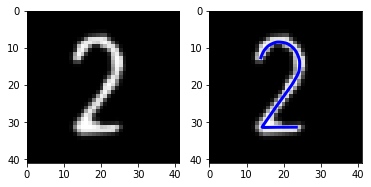

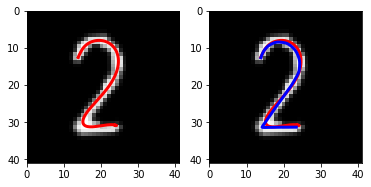

In [9]:
test_sample_indices = [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732]
y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
y_r = Y_test[test_sample_indices]

plt.figure()
image = images[test_sample_indices[0]]
H, W = image.shape
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])


plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.show()
# plt.savefig('./images/demo.png')

### 2, Load the SCNN-NDP model (N=25, T=300) trained on s-MNIST-AWGN

In [10]:
k = 1
T = 300 / k
N = 25
pre_trained = '../ndp/mnist_cnn/cnn_trained/mnist_cnn_net_simple_500(mnist-awgn).pt'
model = NdpSCNN(T=T, l=1, N=N, pt=pre_trained, state_index=np.arange(2))

path = '../ndp/ndp_models/scnn-ndp-il_(smnist-awgn)_(T300.0_K1_N25_L0.001_E150_B100)_(2021_07_30_19_26_31_227167)/scnn-model.pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

NdpSCNN(
  (pt): SimpleCNNNet(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=2880, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
  (middle_layer_1): Linear(in_features=500, out_features=100, bias=True)
  (middle_layer_2): Linear(in_features=100, out_features=500, bias=True)
  (middle_layer_3): Linear(in_features=500, out_features=108, bias=True)
  (middle_layer_4): Linear(in_features=108, out_features=54, bias=True)
  (last_fc): Linear(in_features=54, out_features=54, bias=True)
)

In [11]:
# Synthetic MNIST(s-MNIST-AWGN)
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = '../../imednet/data/s-mnist/40x40-smnist-with-awgn.mat'
data_stub = 'smnist-awgn'
# load the snist image data
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [12]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

<ipython-input-2-d251c861ed21>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


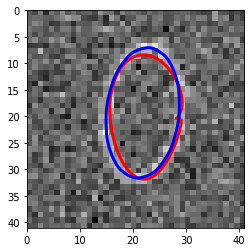

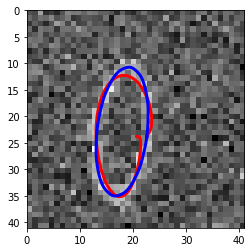

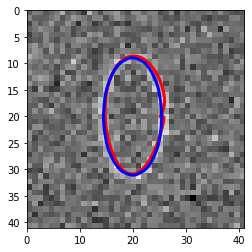

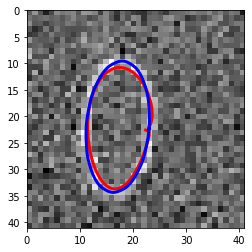

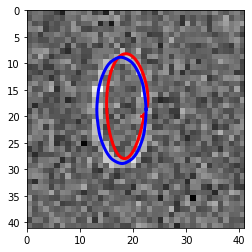

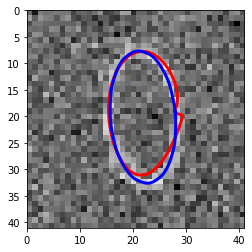

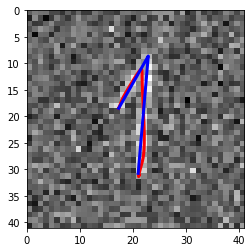

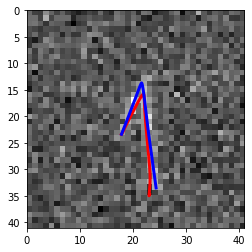

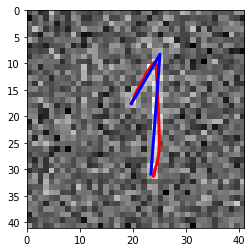

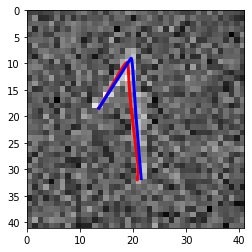

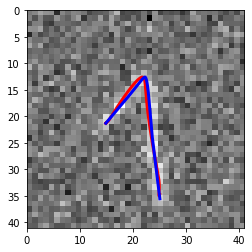

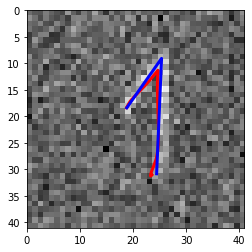

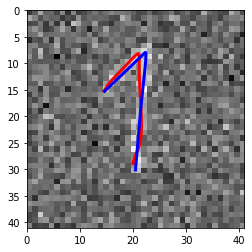

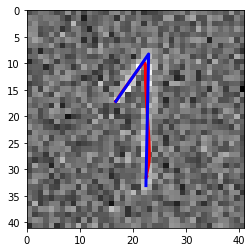

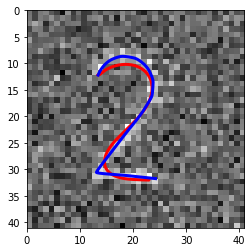

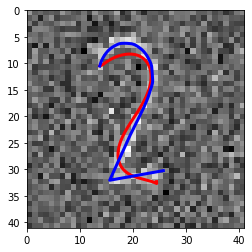

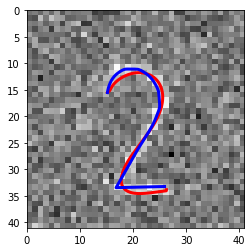

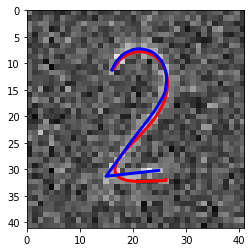

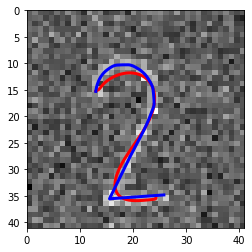

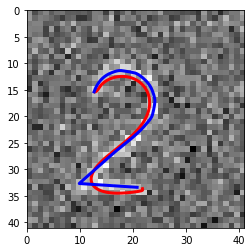

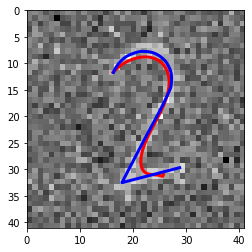

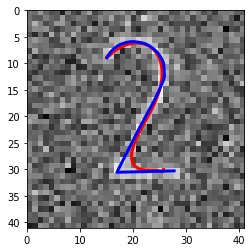

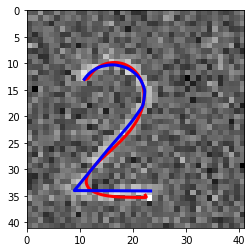

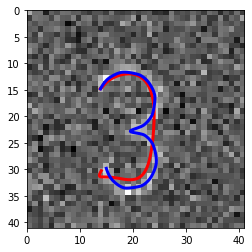

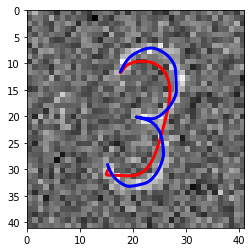

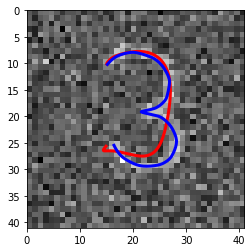

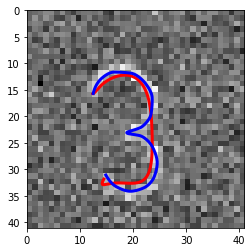

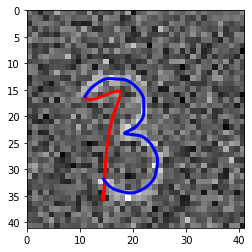

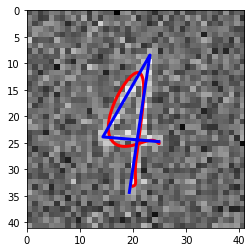

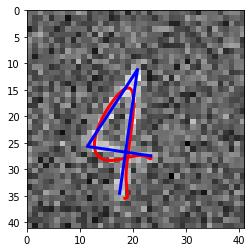

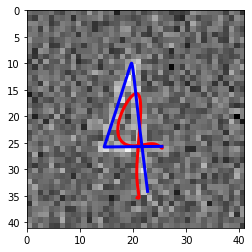

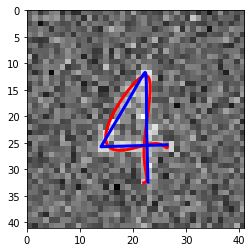

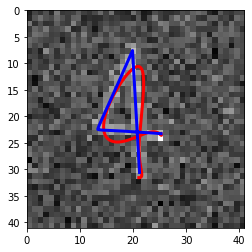

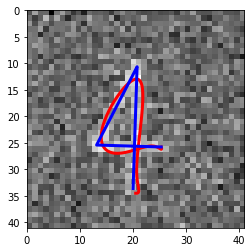

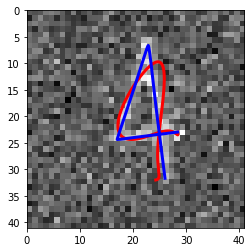

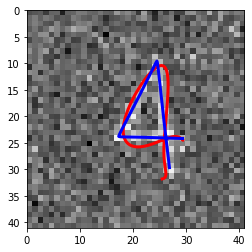

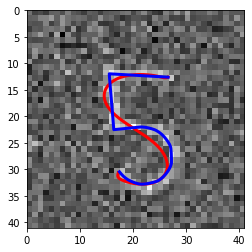

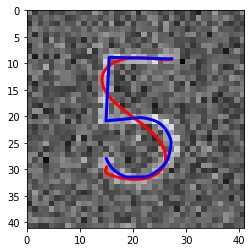

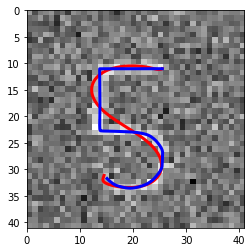

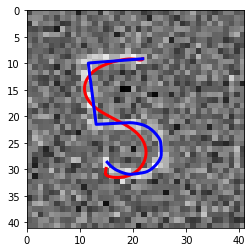

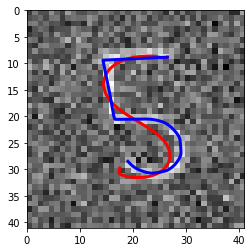

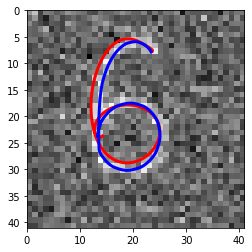

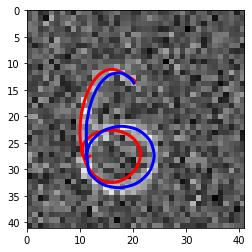

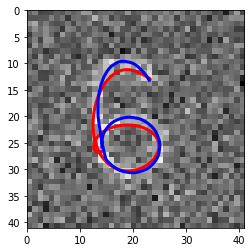

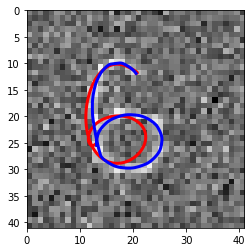

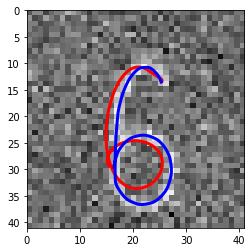

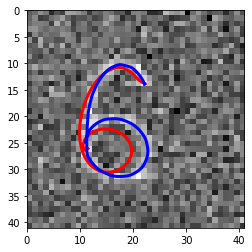

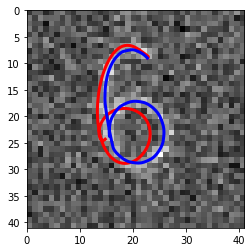

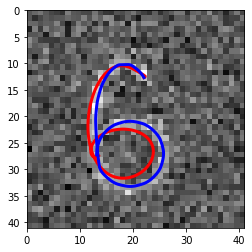

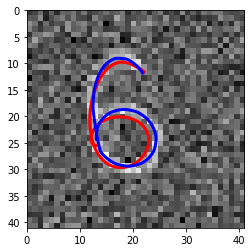

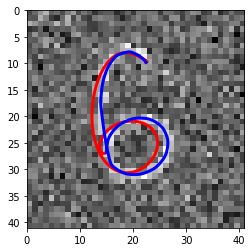

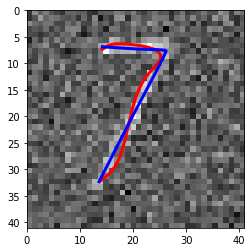

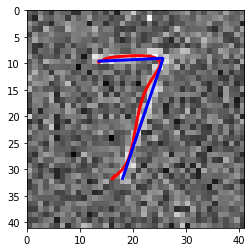

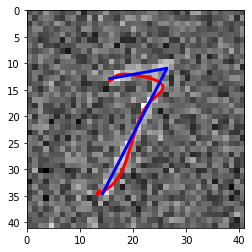

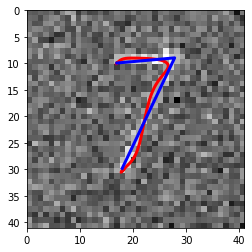

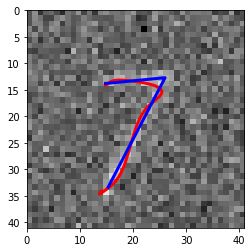

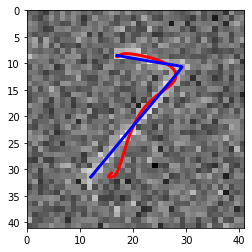

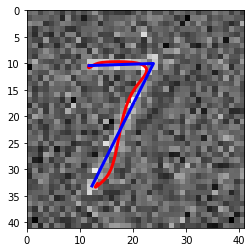

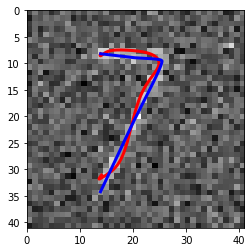

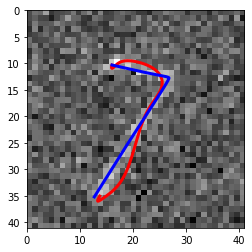

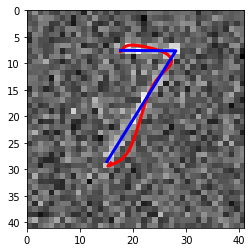

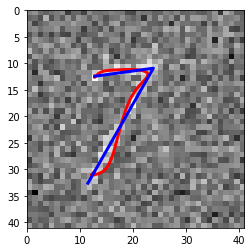

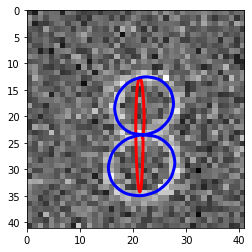

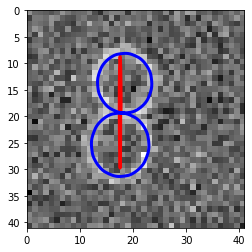

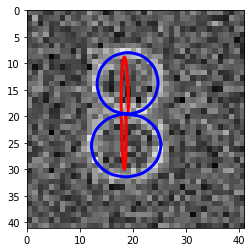

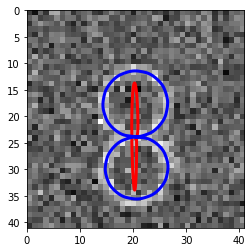

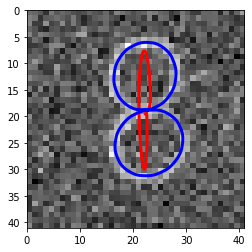

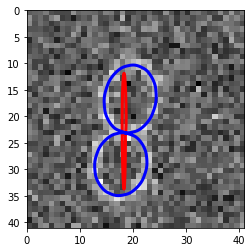

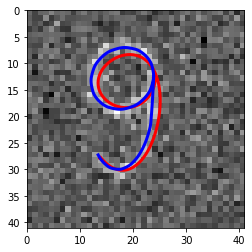

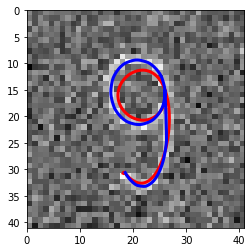

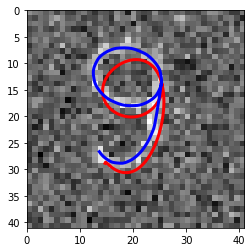

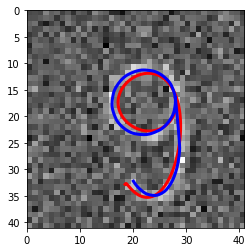

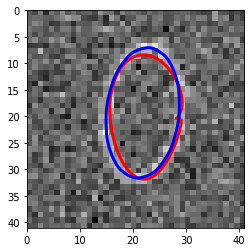

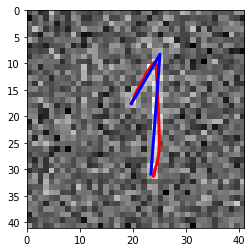

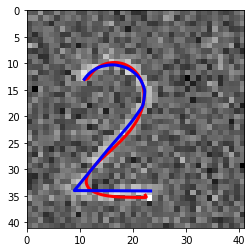

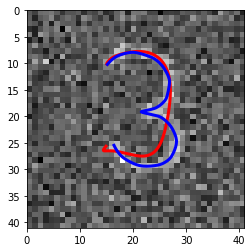

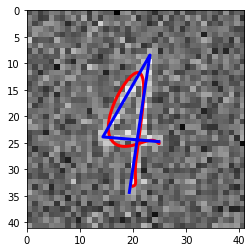

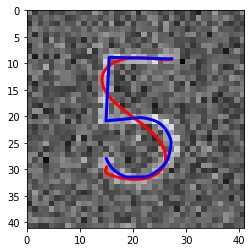

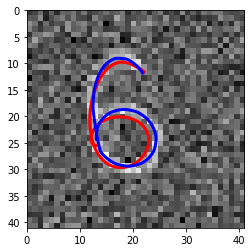

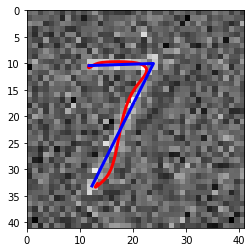

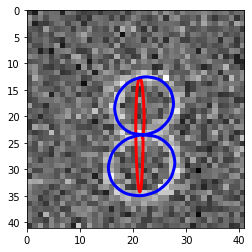

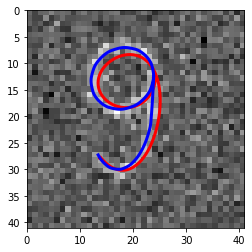

In [13]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/scnn-ndp/smnist-awgn', data_stub, digit, images, X_test, Y_test, test_sample_indices)

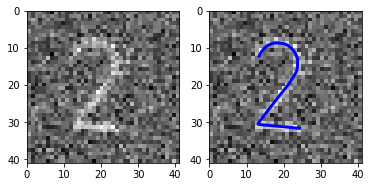

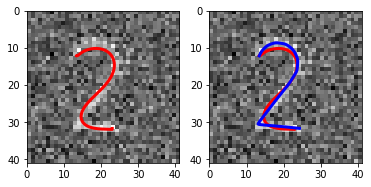

In [14]:
test_sample_indices = [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732]
y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
y_r = Y_test[test_sample_indices]

plt.figure()
image = images[test_sample_indices[0]]
H, W = image.shape
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])


plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.show()

### 3, Load the SCNN-NDP model (N=25, T=300) trained on s-MNIST-MB

In [15]:
k = 1
T = 300 / k
N = 25
pre_trained = '../ndp/mnist_cnn/cnn_trained/mnist_cnn_net_simple_500(mnist-motion-blur).pt'
model = NdpSCNN(T=T, l=1, N=N, pt=pre_trained, state_index=np.arange(2))

path = '../ndp/ndp_models/scnn-ndp-il_(smnist-mb)_(T300.0_K1_N25_L0.001_E150_B100)_(2021_07_30_19_26_47_355138)/scnn-model.pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

NdpSCNN(
  (pt): SimpleCNNNet(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=2880, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
  (middle_layer_1): Linear(in_features=500, out_features=100, bias=True)
  (middle_layer_2): Linear(in_features=100, out_features=500, bias=True)
  (middle_layer_3): Linear(in_features=500, out_features=108, bias=True)
  (middle_layer_4): Linear(in_features=108, out_features=54, bias=True)
  (last_fc): Linear(in_features=54, out_features=54, bias=True)
)

In [16]:
# Synthetic MNIST(s-MNIST-MB)
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = '../../imednet/data/s-mnist/40x40-smnist-with-motion-blur.mat'
data_stub = 'smnist-mb'
# load the snist image data
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [17]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

<ipython-input-2-d251c861ed21>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


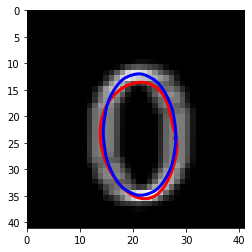

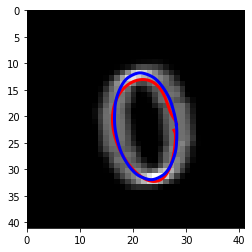

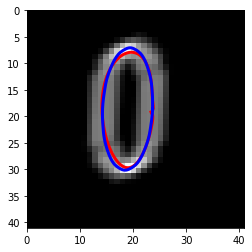

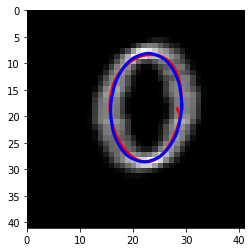

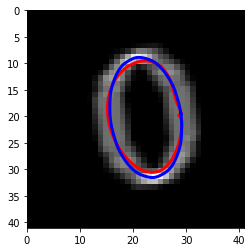

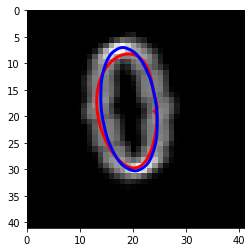

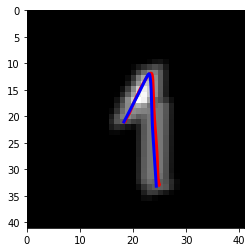

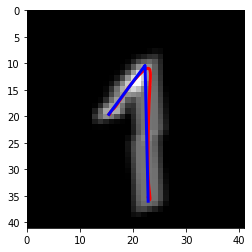

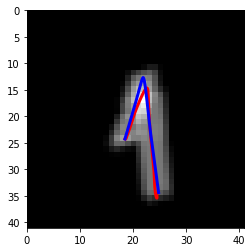

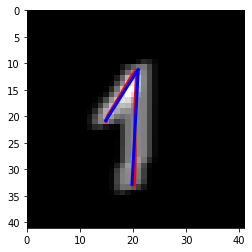

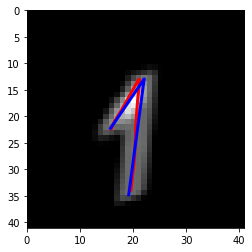

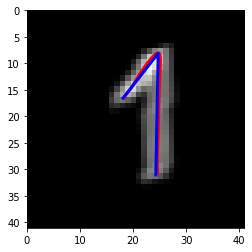

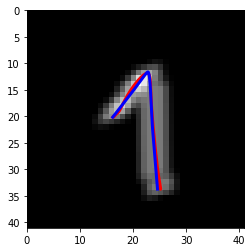

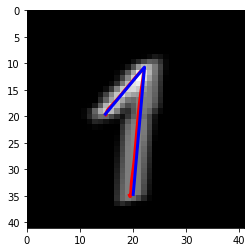

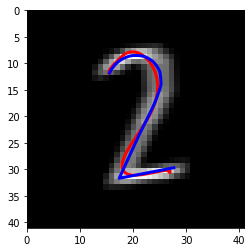

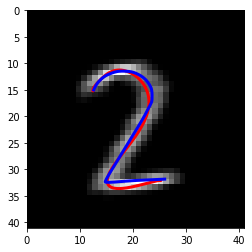

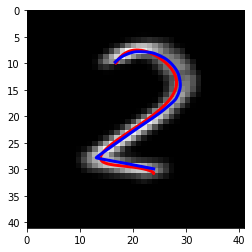

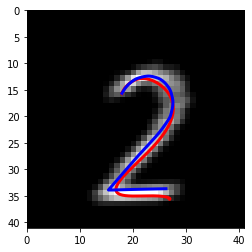

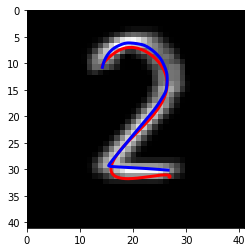

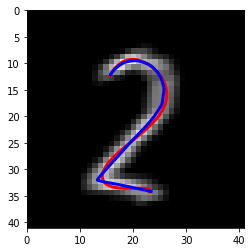

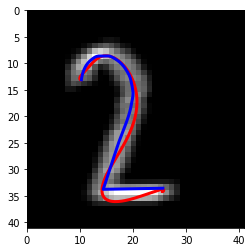

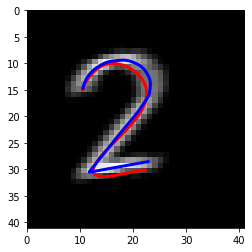

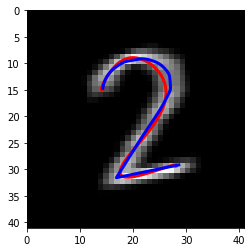

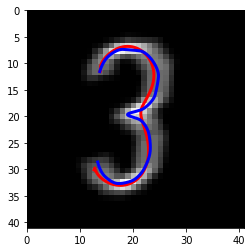

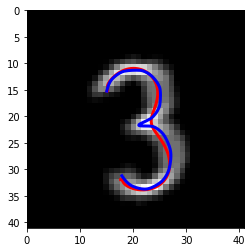

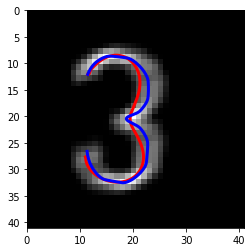

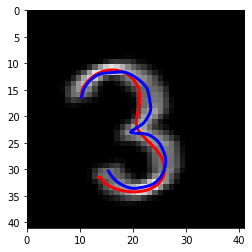

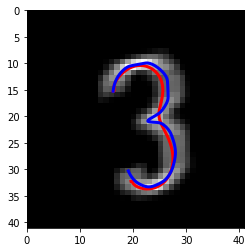

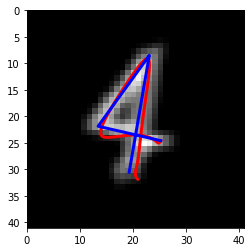

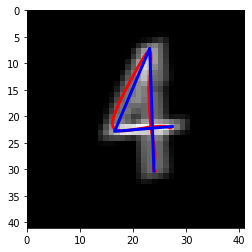

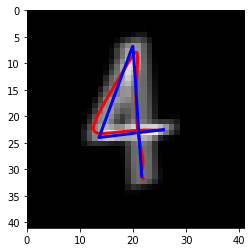

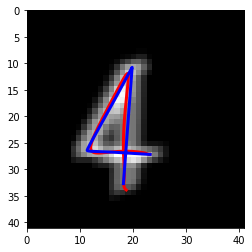

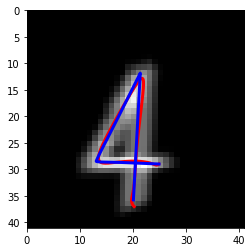

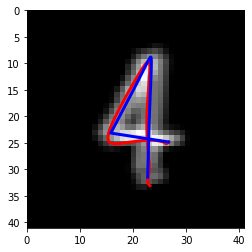

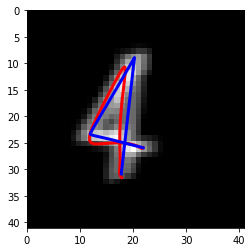

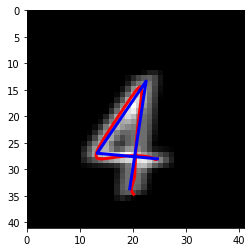

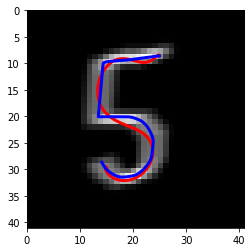

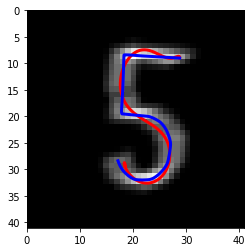

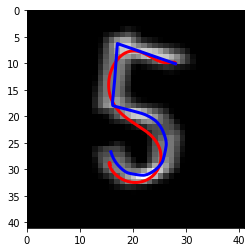

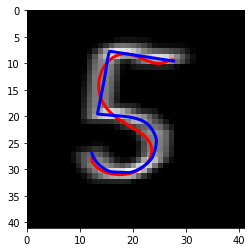

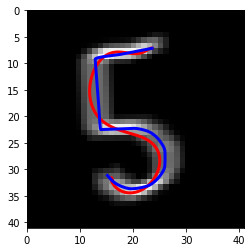

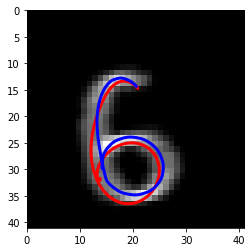

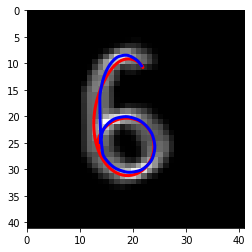

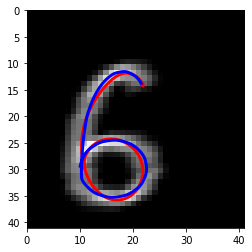

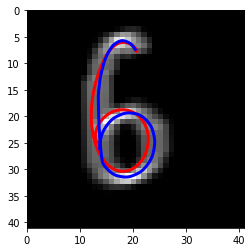

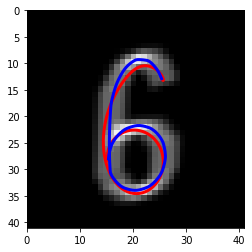

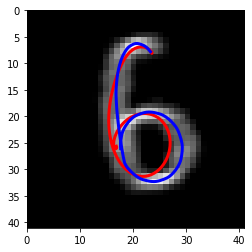

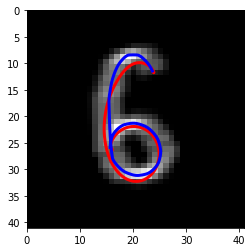

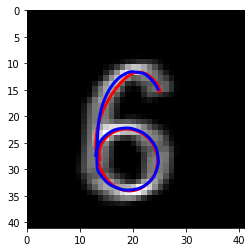

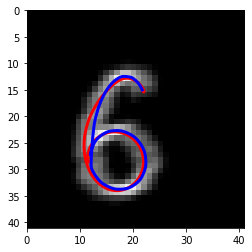

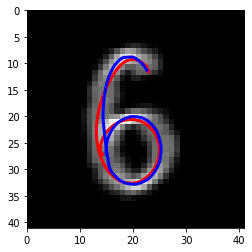

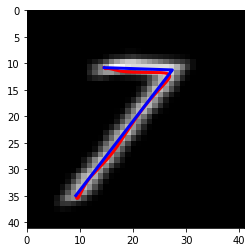

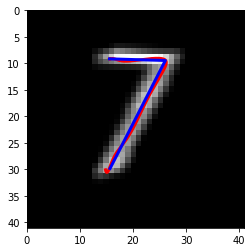

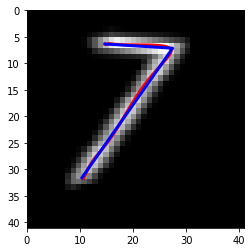

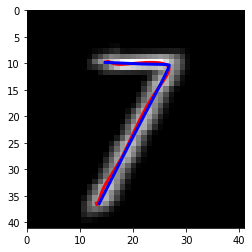

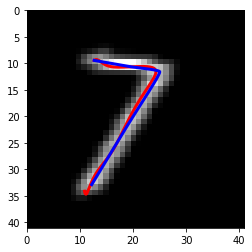

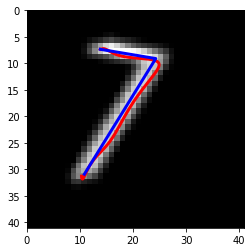

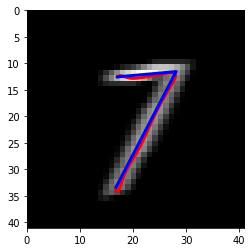

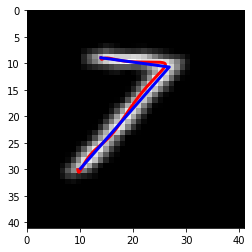

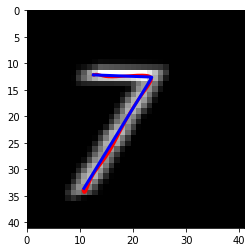

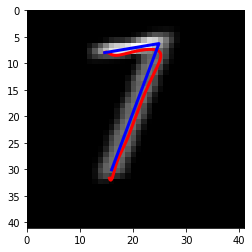

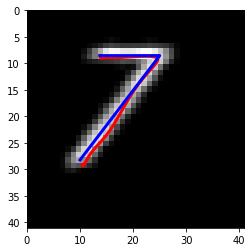

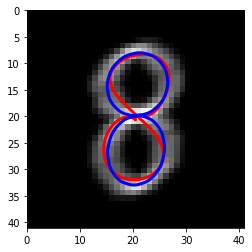

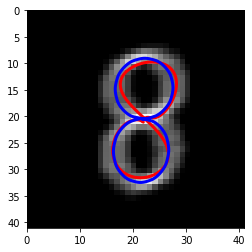

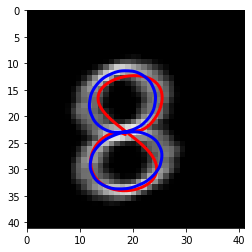

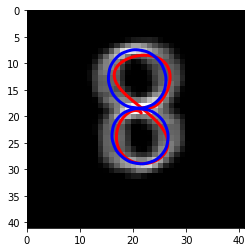

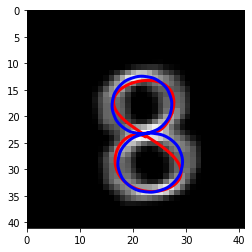

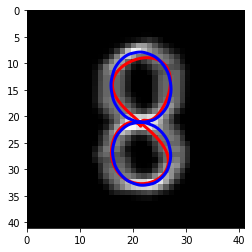

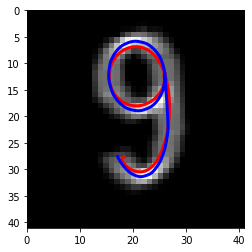

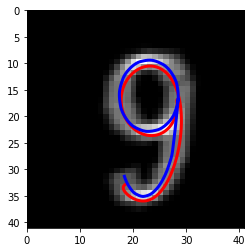

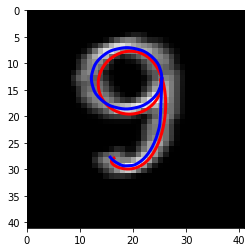

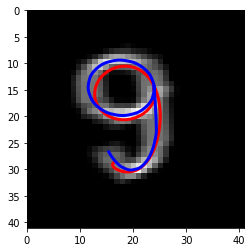

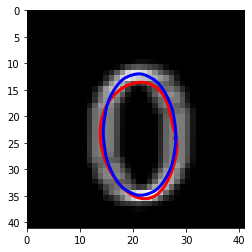

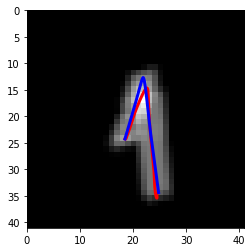

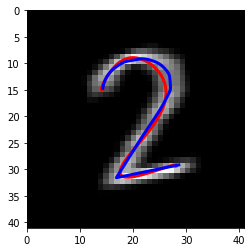

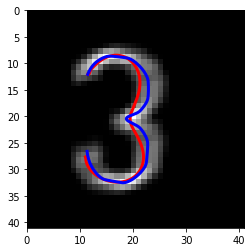

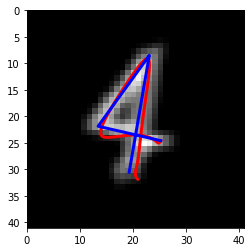

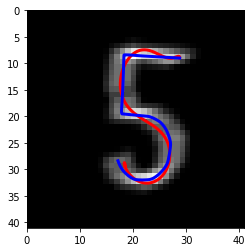

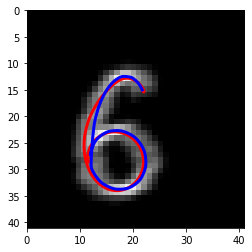

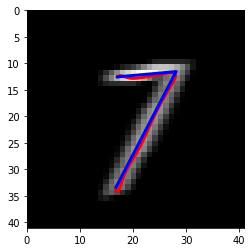

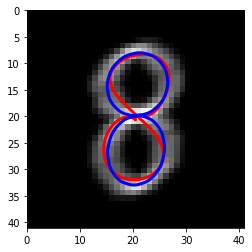

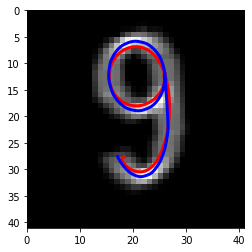

In [18]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/scnn-ndp/smnist-mb', data_stub, digit, images, X_test, Y_test, test_sample_indices)

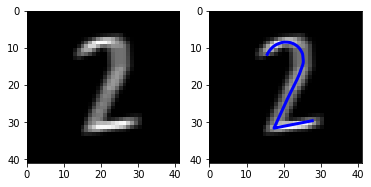

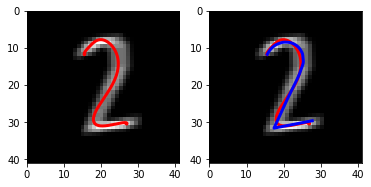

In [19]:
test_sample_indices = [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732]
y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
y_r = Y_test[test_sample_indices]

plt.figure()
image = images[test_sample_indices[0]]
H, W = image.shape
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])


plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.show()

### 4, Load the SCNN-NDP model (N=25, T=300) trained on s-MNIST-RC-AWGN

In [20]:
k = 1
T = 300 / k
N = 25
pre_trained = '../ndp/mnist_cnn/cnn_trained/mnist_cnn_net_simple_500(mnist-reduced-contrast-and-awgn).pt'
model = NdpSCNN(T=T, l=1, N=N, pt=pre_trained, state_index=np.arange(2))

path = '../ndp/ndp_models/scnn-ndp-il_(smnist-rc-awgn)_(T300.0_K1_N25_L0.001_E150_B100)_(2021_07_30_19_26_56_287035)/scnn-model.pt'
model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
model.eval()

NdpSCNN(
  (pt): SimpleCNNNet(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=2880, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
  (middle_layer_1): Linear(in_features=500, out_features=100, bias=True)
  (middle_layer_2): Linear(in_features=100, out_features=500, bias=True)
  (middle_layer_3): Linear(in_features=500, out_features=108, bias=True)
  (middle_layer_4): Linear(in_features=108, out_features=54, bias=True)
  (last_fc): Linear(in_features=54, out_features=54, bias=True)
)

In [21]:
# Synthetic MNIST(s-MNIST-RC-AWGN)
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = '../../imednet/data/s-mnist/40x40-smnist-with-reduced-contrast-and-awgn.mat'
data_stub = 'smnist-rc-awgn'
# load the snist image data
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

In [22]:
# transform the images from 40x40 to 28x28
images_resize = np.array([cv2.resize(img, (28, 28)) for img in images]) / 255.0
outputs_resize = np.array([cv2.resize(img, (28, 28)) for img in outputs]) / 255.0
input_size = images_resize.shape[1] * images_resize.shape[2]

# to torch tensor
X_test = torch.Tensor(images_resize).float()
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
O_test = torch.Tensor(images_resize).float()

<ipython-input-2-d251c861ed21>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


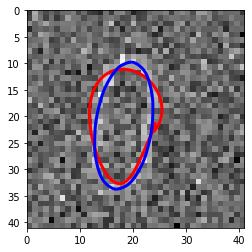

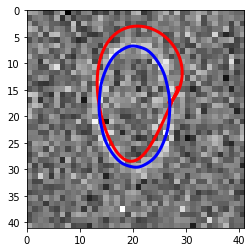

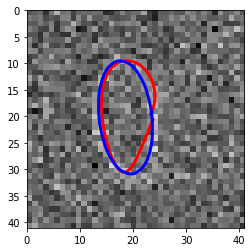

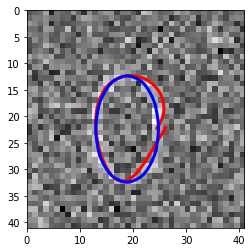

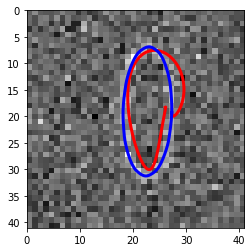

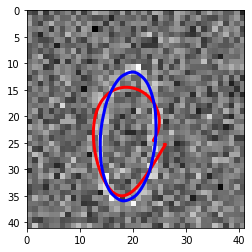

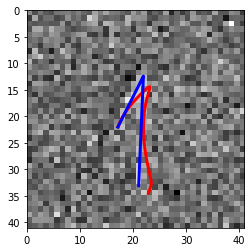

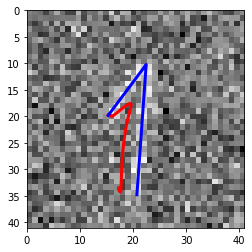

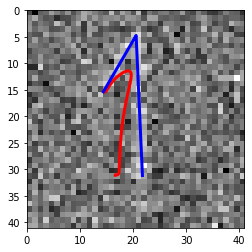

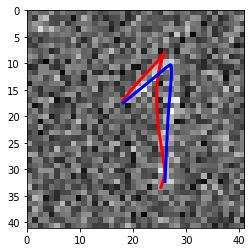

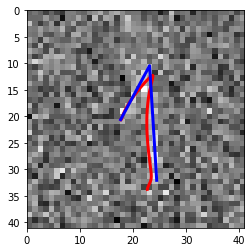

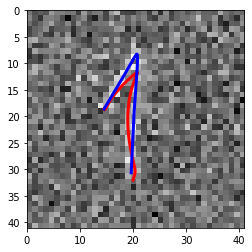

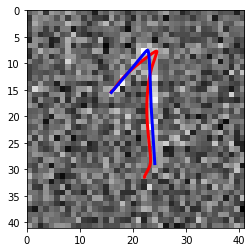

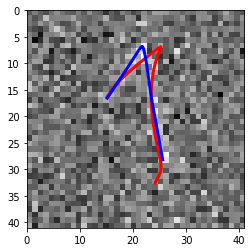

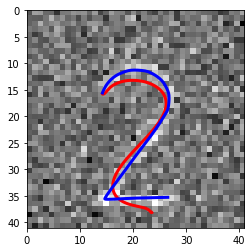

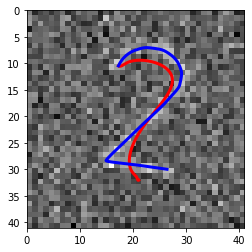

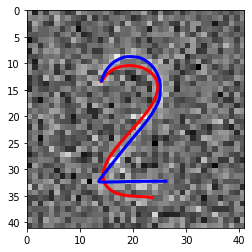

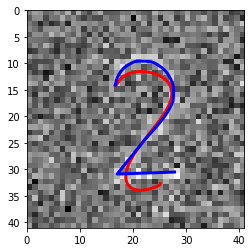

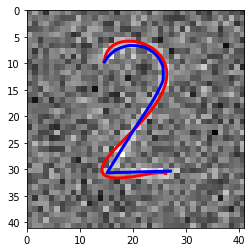

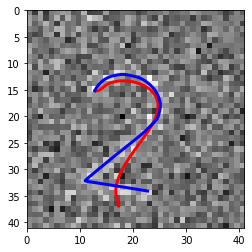

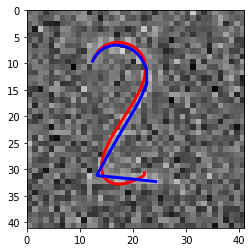

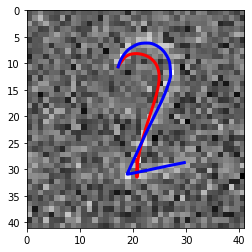

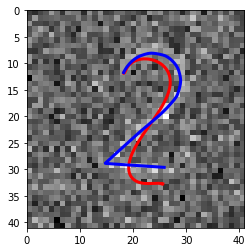

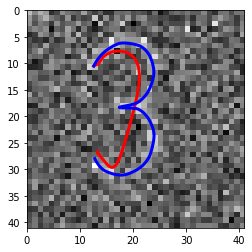

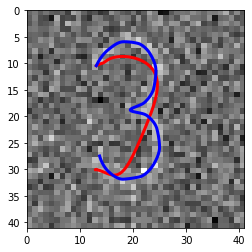

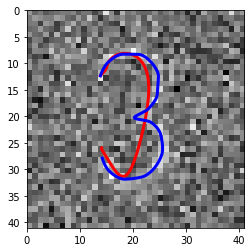

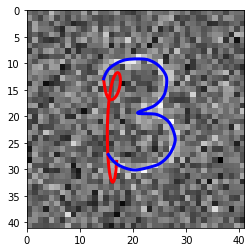

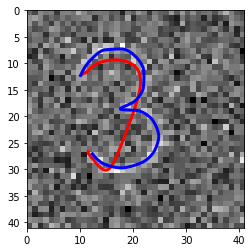

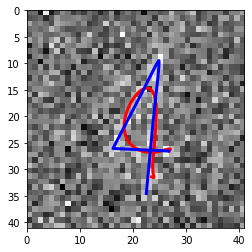

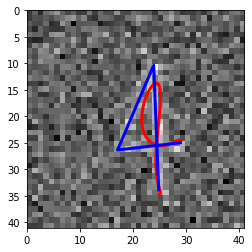

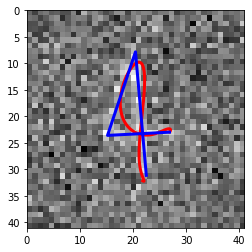

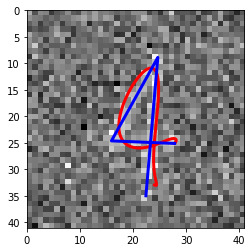

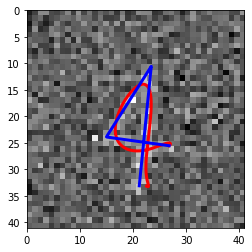

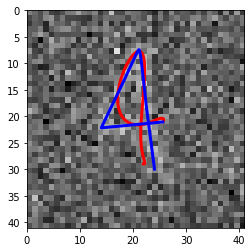

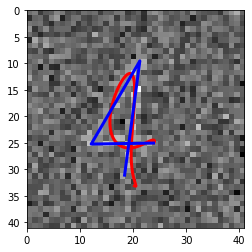

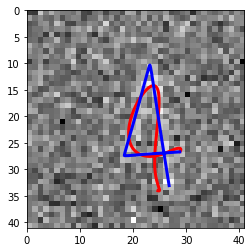

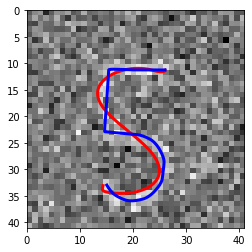

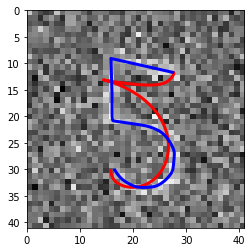

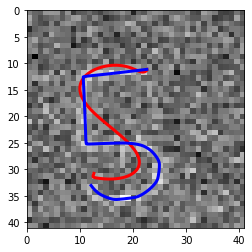

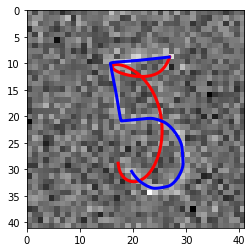

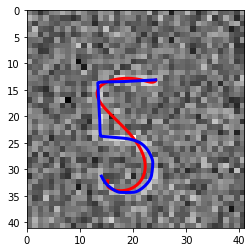

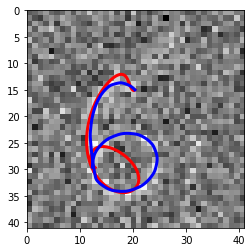

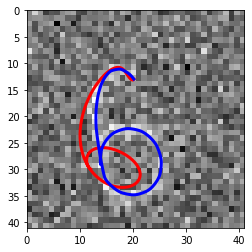

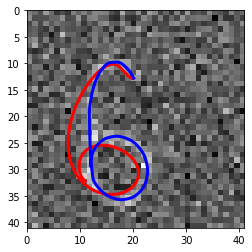

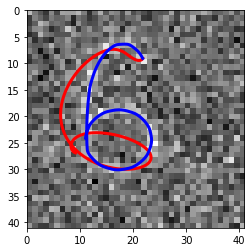

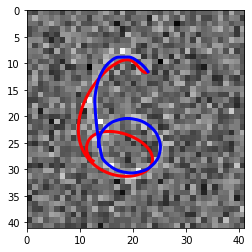

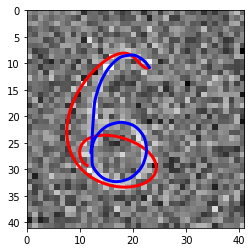

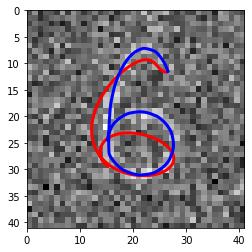

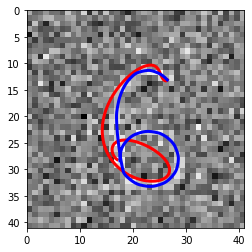

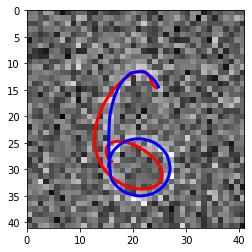

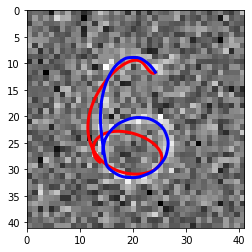

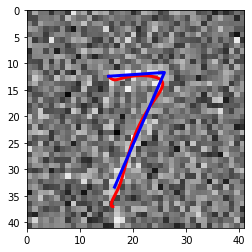

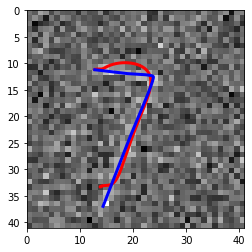

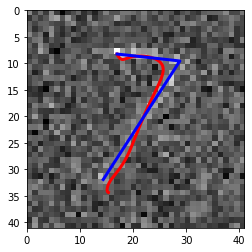

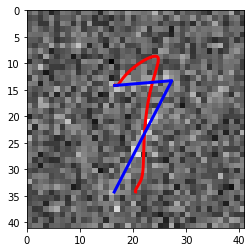

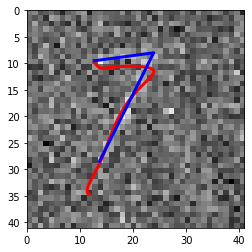

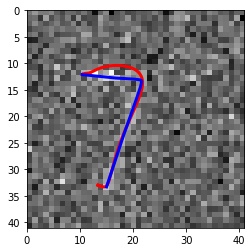

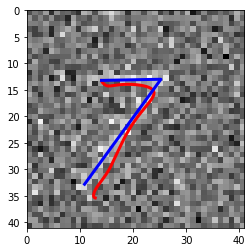

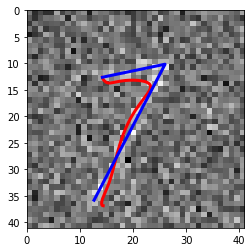

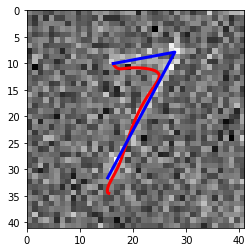

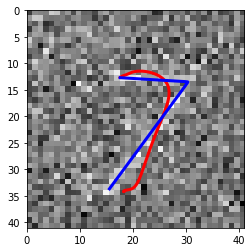

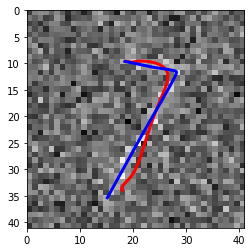

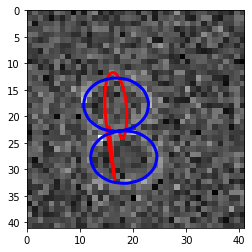

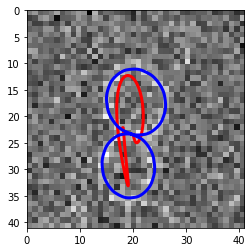

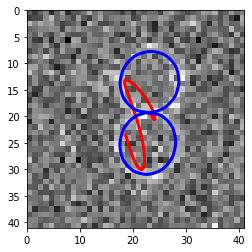

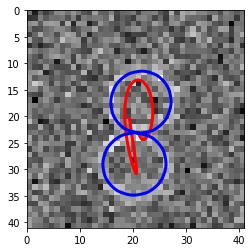

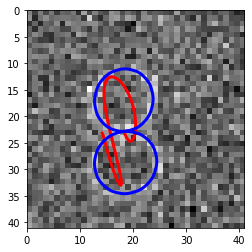

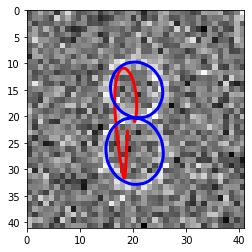

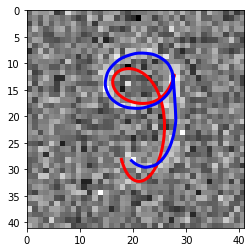

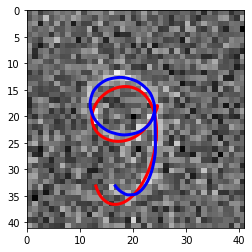

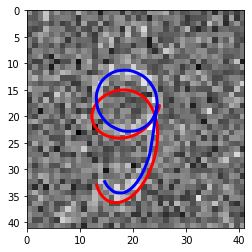

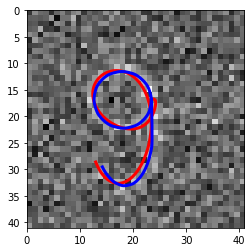

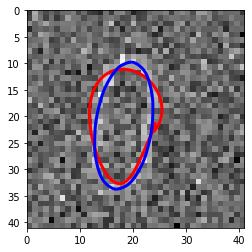

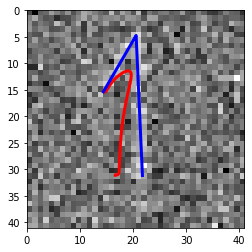

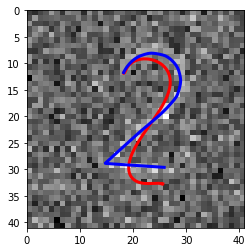

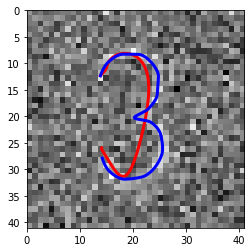

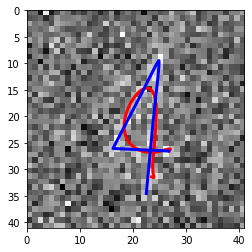

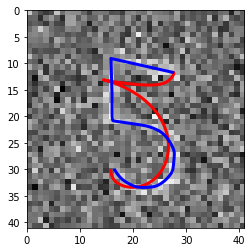

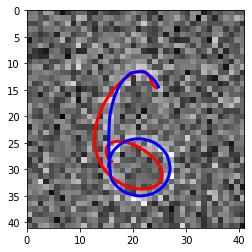

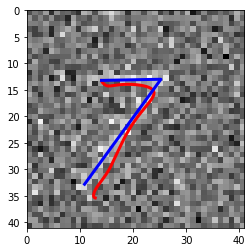

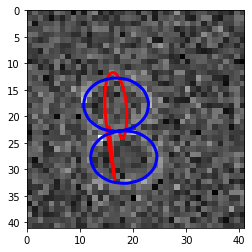

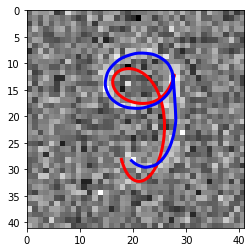

In [23]:
# loop for show the images
for i in range(0, len(digit_str)):
    digit = digit_str[i]
    test_sample_indices = test_samples[i]
    show_images('./images/scnn-ndp/smnist-rc-awgn', data_stub, digit, images, X_test, Y_test, test_sample_indices)

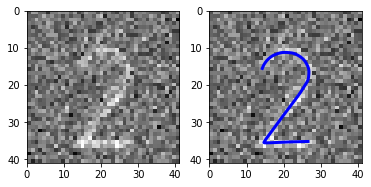

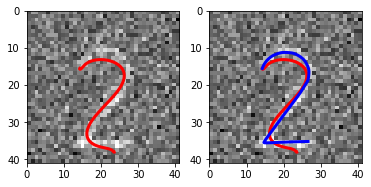

In [24]:
test_sample_indices = [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732]
y_h = model(X_test[test_sample_indices], Y_test[test_sample_indices, 0, :])
y_r = Y_test[test_sample_indices]

plt.figure()
image = images[test_sample_indices[0]]
H, W = image.shape
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])


plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.plot(y_h[0, :, 0].detach().cpu().numpy(),y_h[0, :, 1].detach().cpu().numpy(), c='r', linewidth=3)
plt.plot(y_r[0, :, 0].detach().cpu().numpy(),y_r[0, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
plt.axis('on')

plt.show()